## Loading data & Libraries

In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("../data/churn.csv")

In [3]:
df.shape

(37354, 11)

In [4]:
df.sample(5)

,Unnamed: 0,char_id,guild,total_timestamps,unique_days,max_level,min_month,max_month,Average_Hour,Average_Playing_density,Playing_after_6_months
11971,11971,64671,1,292,14,41,1,6,3.476190,0.076503,1
11993,11993,64724,0,1,1,14,1,1,0.166667,0.032787,0
13290,13290,66488,0,1,1,7,1,1,0.166667,0.032787,0
31265,31265,84474,0,69,4,15,10,10,2.875000,0.131148,0
14045,14045,67243,0,54,7,10,1,3,1.285714,0.076503,0


## Data cleaning & Exploratory data analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37354 entries, 0 to 37353
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               37354 non-null  int64  
 1   char_id                  37354 non-null  int64  
 2   guild                    37354 non-null  int64  
 3   total_timestamps         37354 non-null  int64  
 4   unique_days              37354 non-null  int64  
 5   max_level                37354 non-null  int64  
 6   min_month                37354 non-null  int64  
 7   max_month                37354 non-null  int64  
 8   Average_Hour             37354 non-null  float64
 9   Average_Playing_density  37354 non-null  float64
 10  Playing_after_6_months   37354 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 3.1 MB


In [6]:
df.describe()

,Unnamed: 0,char_id,guild,total_timestamps,unique_days,max_level,min_month,max_month,Average_Hour,Average_Playing_density,Playing_after_6_months
count,37354.000000,37354.000000,37354.000000,37354.000000,37354.000000,37354.000000,37354.000000,37354.000000,37354.000000,37354.000000,37354.000000
mean,18676.500000,63453.951946,0.323125,289.841356,18.510655,20.474353,6.077288,8.355303,1.063722,0.110244,0.219655
std,10783.315314,24402.571830,0.467676,957.006915,44.083495,26.133273,4.029626,3.525334,1.341382,0.153310,0.414019
min,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,0.005464,0.000000
25%,9338.250000,52801.250000,0.000000,2.000000,1.000000,1.000000,2.000000,6.000000,0.166667,0.032787,0.000000
50%,18676.500000,71877.500000,0.000000,6.000000,2.000000,6.000000,6.000000,10.000000,0.500000,0.032787,0.000000
75%,28014.750000,81223.750000,1.000000,59.000000,10.000000,32.000000,10.000000,11.000000,1.416667,0.098361,0.000000
max,37353.000000,90580.000000,1.000000,42801.000000,352.000000,80.000000,12.000000,12.000000,20.265625,0.983607,1.000000


In [7]:
df.isnull().sum()

Unnamed: 0                 0
char_id                    0
guild                      0
total_timestamps           0
unique_days                0
max_level                  0
min_month                  0
max_month                  0
Average_Hour               0
Average_Playing_density    0
Playing_after_6_months     0
dtype: int64

## Data Preprocessing

In [8]:
df1 = df.drop(['Unnamed: 0', 'char_id', 'min_month'], axis = 'columns')

In [9]:
df1.columns.tolist()

['guild',
 'total_timestamps',
 'unique_days',
 'max_level',
 'max_month',
 'Average_Hour',
 'Average_Playing_density',
 'Playing_after_6_months']

In [10]:
X = df1.drop('Playing_after_6_months', axis=1)
y = df1['Playing_after_6_months']

In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 37354 entries, 0 to 37353
Series name: Playing_after_6_months
Non-Null Count  Dtype
--------------  -----
37354 non-null  int64
dtypes: int64(1)
memory usage: 292.0 KB


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37354 entries, 0 to 37353
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   guild                    37354 non-null  int64  
 1   total_timestamps         37354 non-null  int64  
 2   unique_days              37354 non-null  int64  
 3   max_level                37354 non-null  int64  
 4   max_month                37354 non-null  int64  
 5   Average_Hour             37354 non-null  float64
 6   Average_Playing_density  37354 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 2.0 MB


##### ***All columns are numeric, so standard scaling is a must for models like neural networks.***

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Model Building

#### **Decision Tree Model**

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\nAccuracy :\n", accuracy_score(y_pred_dt, y_test))
print("\nConfusion Matrix :\n", confusion_matrix(y_pred_dt, y_test))
print("\nClassification Report \n:", classification_report(y_pred_dt, y_test))


Accuracy :
 0.999063043769241

Confusion Matrix :
 [[5832    5]
 [   2 1632]]

Classification Report 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      1.00      1.00      1634

    accuracy                           1.00      7471
   macro avg       1.00      1.00      1.00      7471
weighted avg       1.00      1.00      1.00      7471



#### **XGBoost Model**

In [17]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

E:\verma\envs\churn-project\lib\site-packages\xgboost\training.py:183: UserWarning: [15:42:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:
print("Accuracy :", accuracy_score(y_pred_xgb, y_test))
print("Confusion Matrix :", confusion_matrix(y_pred_xgb, y_test))
print("Classification Report :", classification_report(y_pred_xgb, y_test))

Accuracy : 1.0
Confusion Matrix : [[5834    0]
 [   0 1637]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5834
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      7471
   macro avg       1.00      1.00      1.00      7471
weighted avg       1.00      1.00      1.00      7471



Playing_after_6_months
0    29149
1     8205
Name: count, dtype: int64


<Axes: xlabel='Playing_after_6_months', ylabel='count'>

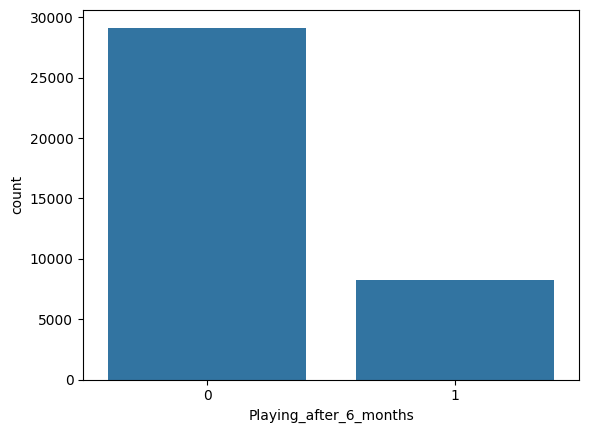

In [19]:
import seaborn as sns
print(y.value_counts())
sns.countplot(x=y)


In [21]:
# For decision tree / XGBoost
print(np.unique(y_pred_xgb, return_counts=True))

(array([0, 1]), array([5834, 1637]))
